Importing the libraries to be used

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression   # for logistic Regression

from sklearn.tree import DecisionTreeClassifier       # for the decision tree

from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier   # for the random forests

# for the gradient boosting classifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
## Loading the Dataset from the csv file present in this root directory
df = pd.read_csv('train_data.csv')

In [3]:
df.describe()     # viewing the data sr upto some rows

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()    # information of the data and its types present in the csv file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Finding the no of null values present in the data 

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Wherever the numerical values had to be present but is null, then there we are filling the mean values of the data 

In [6]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

Wherever the non-numerical values were to be present that is the categorical values, there we are filling the mode of that data that is the most no of time occuring data

In [7]:
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

chechking again for the null values if present

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

no null values now!!!

now, for providing the loan, we are considering the income of the co applicant too as the applicant borrow a sum of money...

In [9]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


for making data more inclined towards the normal distribution and to make the data more symmetric, appling log transformation

In [10]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
df['Total_Income_Log'] = np.log(df['Total_Income'])
df['LoanAmountLog'] = np.log(df['LoanAmount'])

selecting only numeric columns for the correlation calculation and excludes any non-numeric columns, such as 'Loan_ID'.

<Axes: >

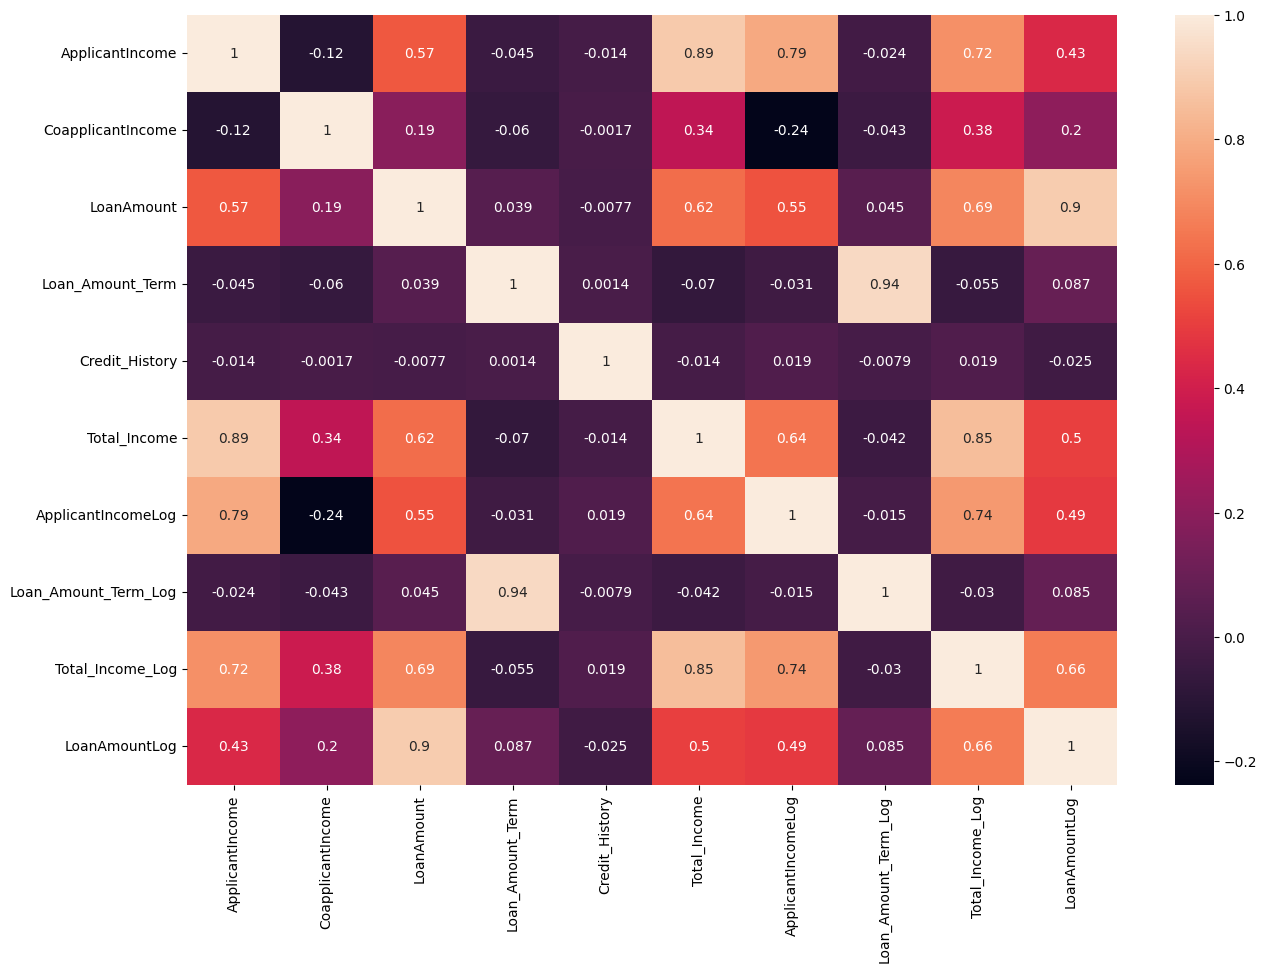

In [11]:
## Getting the correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)

removing the columns which are not in the use now! and then viewing what the data set look like!

In [12]:
cols = ['CoapplicantIncome','Loan_ID','Total_Income','ApplicantIncome','LoanAmount','Loan_Amount_Term']
df = df.drop(columns=cols,axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,Loan_Amount_Term_Log,Total_Income_Log,LoanAmountLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,5.886104,8.674026,4.986426
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,5.886104,8.714568,4.852030
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,5.886104,8.006368,4.189655
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,5.886104,8.505323,4.787492
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,5.886104,8.699515,4.948760


for the better ease of the understanding we are labelling the values of the categorical data as the numbers like 0,1,2...

In [13]:
df['Gender'].value_counts()
df['Gender'] = df['Gender'].replace({'Male':1, 'Female':0})
df['Married'].value_counts()
df['Married'] = df['Married'].replace({'Yes':1, 'No':0})
df['Dependents'].value_counts()
df['Dependents'] = df['Dependents'].replace({'0':0, '1':1, '2':2, '3+':3})
df['Education'].value_counts()
df['Education'] = df['Education'].replace({'Graduate':1, 'Not Graduate':0})
df['Property_Area'].value_counts()
df['Property_Area'] = df['Property_Area'].replace({'Urban':2, 'Semiurban':1, 'Rural':0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes':1, 'No':0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})

In [14]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,Loan_Amount_Term_Log,Total_Income_Log,LoanAmountLog
0,1,0,0,1,0,1.0,2,1,8.674026,5.886104,8.674026,4.986426
1,1,1,1,1,0,1.0,0,0,8.430109,5.886104,8.714568,4.852030
2,1,1,0,1,1,1.0,2,1,8.006368,5.886104,8.006368,4.189655
3,1,1,0,0,0,1.0,2,1,7.856707,5.886104,8.505323,4.787492
4,1,0,0,1,0,1.0,2,1,8.699515,5.886104,8.699515,4.948760


preparing the data for the training on the ML model... 
x contains all the input features (independent variables) that we are using to predict the target variable 'Loan_Status'.
y represents the target variable (dependent variable) that the machine learning model will try to predict.

In [15]:
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

classifying the data and the breaking the data into the test and training set

In [16]:
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy on test set is", model.score(x_test, y_test)*100)
    print("Accuracy on train set is", model.score(x_train,y_train)*100)

    # adding the 5 fold cross validation for the validation of the ML model
    score = cross_val_score(model, x , y , cv=5)
    print("Cross validation is",np.mean(score)*100)


Logistic Regression

In [17]:
model = LogisticRegression()
classify(model, x , y)

Accuracy on test set is 78.86178861788618
Accuracy on train set is 81.4663951120163
Cross validation is 80.9462881514061


Decision Tree

In [18]:
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy on test set is 69.10569105691057
Accuracy on train set is 100.0
Cross validation is 70.687724910036


Random Forests

In [19]:
model = RandomForestClassifier()
classify(model, x, y)

Accuracy on test set is 78.04878048780488
Accuracy on train set is 100.0
Cross validation is 78.82980141276823


Gradient Boosting Classifier

In [20]:
#---#  Hyperparameters
num_estimators = [250, 500, 750]
learn_rates = [0.05, 0.075,  0.1]
max_depths = [3, 4, 5]
min_samples_leaf = [2, 3]
min_samples_split = [2, 5, 7]
#---

param_grid = {'n_estimators': num_estimators, 'learning_rate': learn_rates, 'max_depth': max_depths, 'min_samples_leaf': min_samples_leaf,'min_samples_split': min_samples_split}
model = GradientBoostingClassifier()
kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, n_jobs=2)
grid_result = grid.fit(x,y)

breaking the data set into the train and test and the 4: 1 ratio i.e. 20% for the testing purpose!

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
grid.score(x_train,y_train)

0.9124236252545825

In [22]:
grid.score(x_test,y_test)

0.9024390243902439

Now, we are giving the more importance to some particular features by providing the weightage to some features!

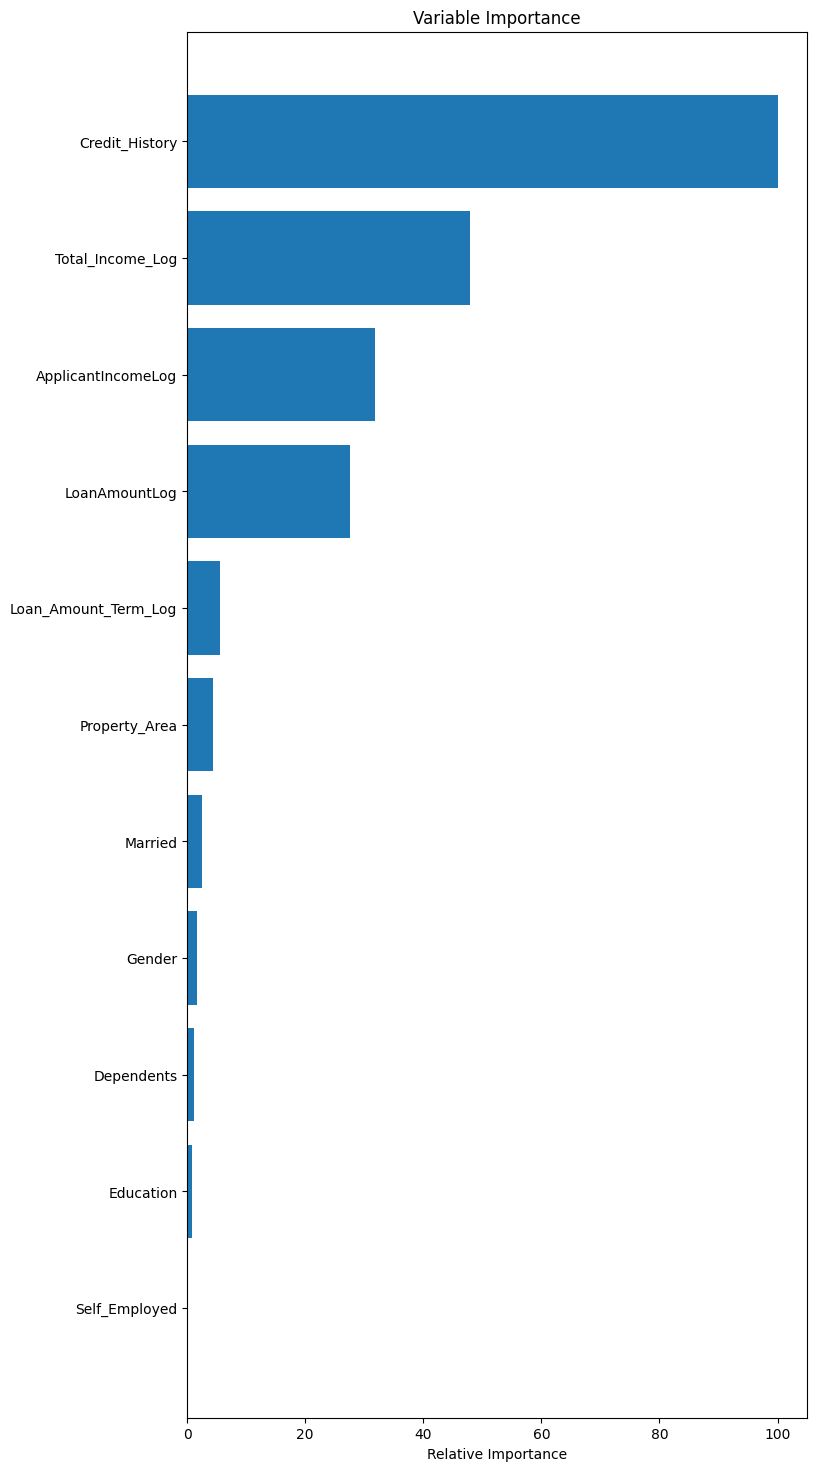

In [23]:
feature_importance = grid.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# plotting the horizontal histogram of the weighted features

plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

let's start taking the inputs from the user using the codes for the categorical data used above

In [24]:
i1 = int(input("Applicant Income = "))

In [25]:
i2 = int(input("Co-Applicant Income = "))

In [26]:
i3 = int(input("Loan Amount = "))

In [27]:
i4 = int(input("Loan Term = "))

In [28]:
i5 = int(input("Property Area (Enter 2 if 'Urban', 1 if 'Semi-Urban', 0 if 'Rural') = "))

In [29]:
i6 = int(input("Married (Enter 1 if 'Yes', 0 if 'No')  = "))

In [30]:
i7 = int(input("Gender (Enter 1 if 'Male', 0 if 'Female') = "))

In [31]:
i8 = int(input("Number of Dependents (Enter 0 if 0 Dependents, 1 if 1 Dependent, 2 if 2 Dependents, 3 if 3 or more Dependents) = "))

In [32]:
i9 = int(input("Wether you are self Employed or not? (Enter 1 if 'Yes', 0 if 'No')"))

In [33]:
i10 = int(input("Education (Enter 1 if 'Graduate', 0 otherwise) = "))

In [34]:
i11 = int(input("Credit History (Enter 1 if no pending loans, 0 otherwise) = "))

in order to match the encoding use with the features name, making the test set as per it...

In [37]:
df_test = pd.DataFrame({
    'Gender': [i7],
    'Married': [i6],
    'Dependents': [i8],
    'Education': [i10],
    'Self_Employed': [i9],
    'Credit_History': [i11],
    'Property_Area': [i5],
    'ApplicantIncomeLog': [np.log(i1)],
    'Loan_Amount_Term_Log': [np.log(i4)],
    'Total_Income_Log': [np.log(i1 + i2)],
    'LoanAmountLog': [np.log(i3)]
})

In [40]:
result = grid.predict(df_test)
if result[0]==1:
    display(Image(url= "yes.png", width=400, height=400))
else:
    display(Image(url= "no.png", width=400, height=400))